# **Problem Statement 4**

Implement the CNN model for classifying CIFAR10 image dataset by dividing the model into following 4 stages



```
a. Loading and preprocessing the image data
b. Defining the model's architecture
c. Training the model
d. Estimating the model's performance
```



## **Loading and Preprocessing the data**

In [ ]:
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
((train_images, train_labels), (test_images, test_labels)) = cifar10.load_data()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
type(train_images)

numpy.ndarray

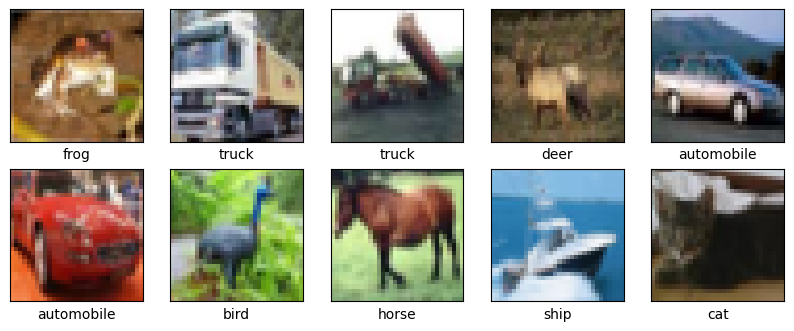

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))

for i in range(10):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

## **Defining the model's architecture**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

## **Training the model**

In [ ]:
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import SGD
sgd = SGD(0.01)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
epoch = 10
h = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=epoch)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.1761 - loss: 2.1875 - val_accuracy: 0.2986 - val_loss: 1.9262
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.3406 - loss: 1.8359 - val_accuracy: 0.4258 - val_loss: 1.5779
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.4354 - loss: 1.5501 - val_accuracy: 0.4917 - val_loss: 1.4220
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.5003 - loss: 1.4033 - val_accuracy: 0.4733 - val_loss: 1.5151
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.5435 - loss: 1.2924 - val_accuracy: 0.5302 - val_loss: 1.3069
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.5695 - loss: 1.2295 - val_accuracy: 0.5515 - val_loss: 1.2528
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 48ms/step - accuracy: 0.5954 - loss: 1.1584 - val_accuracy: 0.5678 - val_loss: 1.2180
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.6173 -

## **Model Performance**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Loss: {}, Test AccuracyL {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6482 - loss: 1.0165
Test Loss: 1.0251537561416626, Test AccuracyL 0.6419000029563904


[]

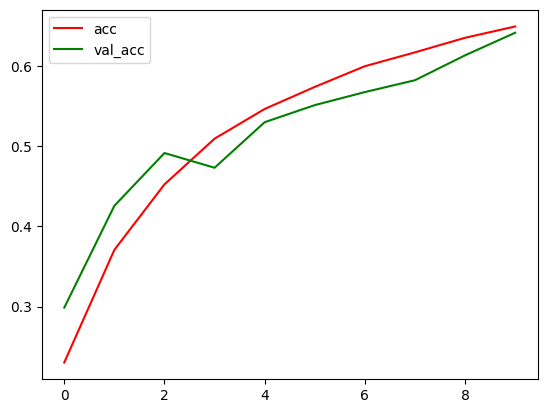

In [ ]:
plt.plot(h.history['accuracy'], label='acc', color='red')
plt.plot(h.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [ ]:
print(h.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


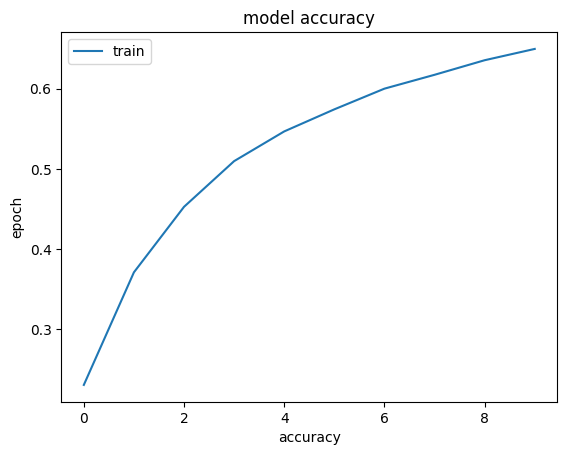

In [ ]:
plt.plot(h.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

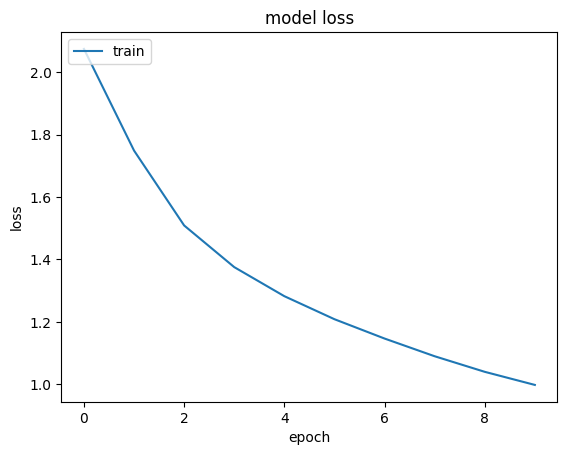

In [ ]:
plt.plot(h.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
2


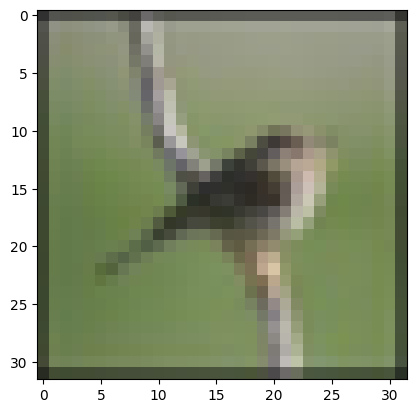

In [ ]:
image_index = 3333
plt.imshow(test_images[image_index].reshape(32, 32, 3), cmap="Greys")
pred = model.predict(test_images[image_index].reshape(1, 32, 32, 3))

print(pred.argmax())